In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans

In [95]:
# 영은언니가 데이터 전처리수정완료한 것 불러오기
data = pd.read_csv('전처리수정.csv')
print(data.shape)
data.head()

(2194, 44)


,Unnamed: 0,ID,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0,5524,2,58138.0,0,0,58,635,88,546,...,1,0,0,0,0,0,1,0,0,0
1,1,2174,2,46344.0,1,1,38,11,1,6,...,0,1,0,0,0,0,0,1,0,0
2,2,4141,2,71613.0,0,0,26,426,49,127,...,0,1,0,0,0,1,0,0,0,0
3,3,6182,2,26646.0,1,0,26,11,4,20,...,0,0,1,0,1,0,0,0,0,0
4,4,5324,4,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,1,0,0


In [96]:
# 필요없는 칼럼 제거
data = data.drop(columns=['Unnamed: 0', 'ID'])
data.shape

(2194, 42)

In [97]:
scaler = MinMaxScaler()
data_new = scaler.fit_transform(data)
data_new = pd.DataFrame(data_new)
data_new.columns = data.columns

Text(0, 0.5, 'Inertia')

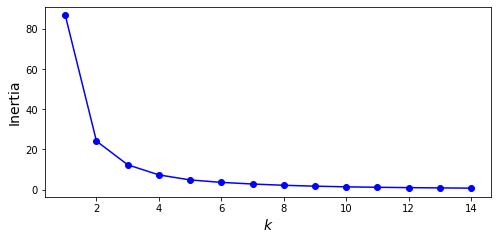

In [99]:
data_income = np.array(data_new['Income']).reshape(-1, 1)

#scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(data_new)

# inertia 그래프
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data_income) for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 15), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

elbow: 3

### income으로 군집화 cluster수는 3

In [133]:
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 42)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
data['cluster'] = model.fit_predict(data_income)
data_new['cluster'] = model.fit_predict(data_income)
data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화,cluster
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,0,0,1,0,0,0,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,1,0,0,0,0,0,1,0,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,1,0,0,0,1,0,0,0,0,1
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,1,0,1,0,0,0,0,0,2
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,1,0,0,0


## income으로 클러스터가 된 것을 확인
- 군집수 4가 아니라 3으로 한 이유는 4로 돌렸을 때 income이 경계가 애매하게 잘렸음을 확인했기 때문

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Income'>

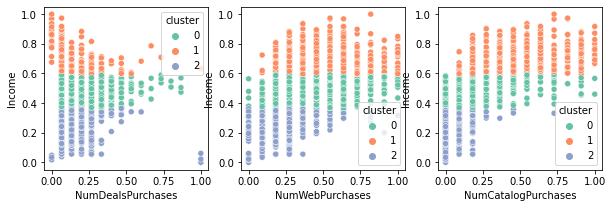

In [103]:
plt.figure(figsize=(10, 3))
plt.subplot(131)
sns.scatterplot(x='NumDealsPurchases', y='Income', data=data_new, hue=data_new['cluster'], palette='Set2')

plt.subplot(132)
sns.scatterplot(x='NumWebPurchases', y='Income', data=data_new, hue=data_new['cluster'], palette='Set2')

plt.subplot(133)
sns.scatterplot(x='NumCatalogPurchases', y='Income', data=data_new, hue=data_new['cluster'], palette='Set2')

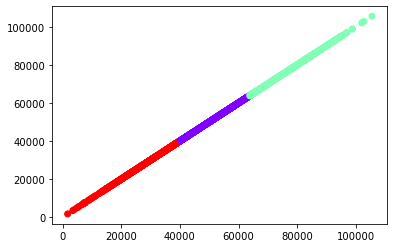

In [134]:
plt.scatter(data.loc[:, 'Income'], data.loc[:, 'Income'], c=data['cluster'], cmap=plt.cm.rainbow)

## income으로 cluster 0,1,2로 나누고 해당 데이터셋생성
- data0=> income 40000~62000(중위권)
- data1=> income 63000~150000(상위권)
- data2=> income 0~40000(하위권)
- 모든 데이터에서 income 삭제

In [135]:
data0 = data_new[data_new['cluster'] == 0] 
data1 = data_new[data_new['cluster'] == 1] 
data2 = data_new[data_new['cluster'] == 2] 
data0 = data0.drop(['Income', 'cluster'] ,axis=1) 
data1 = data1.drop(['Income', 'cluster'] ,axis=1) 
data2 = data2.drop(['Income', 'cluster'] ,axis=1)  

In [136]:
print(data0.shape)
data0.head()

(766, 41)


,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0.333333,0.0,0.0,0.585859,0.425318,0.442211,0.554878,0.664093,0.444444,0.335878,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.333333,0.5,0.5,0.383838,0.007368,0.005025,0.006098,0.007722,0.005051,0.022901,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.5,0.0,0.949495,0.115874,0.216080,0.119919,0.177606,0.136364,0.057252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.666667,0.0,0.5,0.161616,0.348292,0.211055,0.099593,0.000000,0.212121,0.053435,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.333333,0.0,0.5,0.343434,0.157401,0.326633,0.166667,0.193050,0.247475,0.103053,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [137]:
print(data1.shape)
data1.head()

(718, 41)


,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
2,0.333333,0.0,0.0,0.262626,0.285332,0.246231,0.129065,0.428571,0.106061,0.160305,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,1.000000,0.0,0.0,0.232323,0.673811,0.110553,0.116870,0.227799,0.343434,0.171756,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,0.666667,0.0,0.5,0.919192,0.677830,0.402010,0.506098,0.000000,0.080808,0.671756,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21,1.000000,0.0,0.5,0.000000,0.257200,0.000000,0.103659,0.081081,0.161616,0.019084,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,1.000000,0.0,0.0,0.969697,0.458138,0.502513,0.814024,0.081081,0.333333,0.000000,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
print(data2.shape)
data2.head()

(710, 41)


,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
3,0.333333,0.5,0.0,0.262626,0.007368,0.020101,0.020325,0.038610,0.015152,0.019084,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.5,0.0,0.323232,0.050904,0.050251,0.056911,0.011583,0.005051,0.087786,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.000000,0.5,0.0,0.191919,0.009377,0.000000,0.024390,0.011583,0.015152,0.007634,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.5,0.5,0.686869,0.018754,0.000000,0.006098,0.003861,0.005051,0.049618,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.595960,0.004019,0.080402,0.011179,0.042471,0.005051,0.061069,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

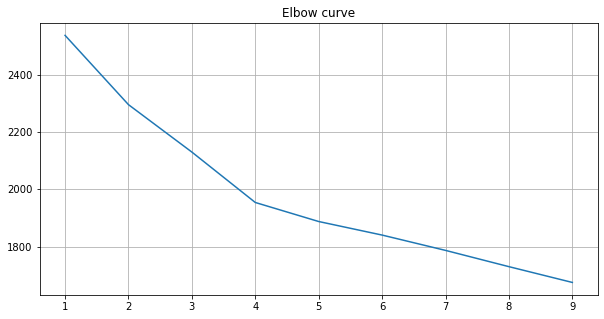

In [139]:
#data0
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(data0)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

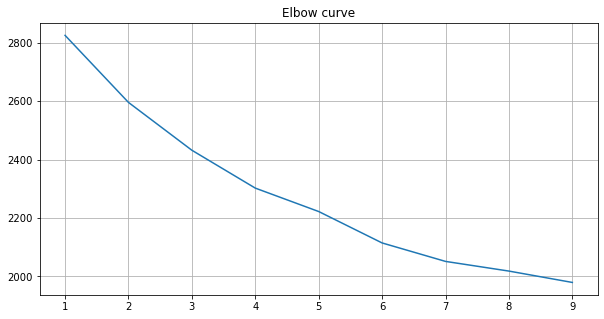

In [140]:
#data1
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(data1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

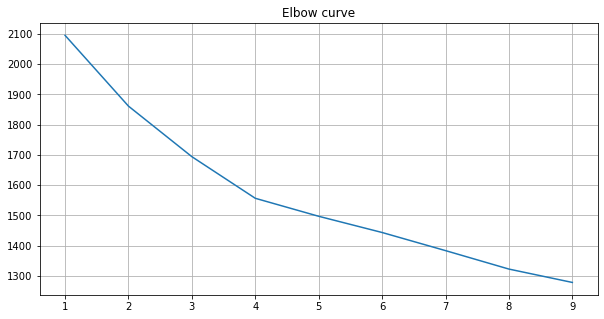

In [141]:
#data2
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(data2)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

- 대부분 클러스터가 2~3으로 나옴.

# data0(상위권)

In [177]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) # 기존 상관관계 22개 변수 사용했었는데 Income 빠져서 21
cust_pca = pca.fit_transform(data0)

print('원본cust: ', str(data0.shape))
print('pcacust: ', str(cust_pca.shape))
print('pca 주성분 형태: ', pca.components_.shape)
print('각 주성분 분산 비율: ', pca.explained_variance_ratio_)
print('설명력: ', sum(pca.explained_variance_ratio_))

원본cust:  (766, 41)
pcacust:  (766, 22)
pca 주성분 형태:  (22, 41)
각 주성분 분산 비율:  [0.09951483 0.0830567  0.07700815 0.07486968 0.06622885 0.06228889
 0.0450998  0.04462851 0.04445059 0.04288197 0.04192296 0.04012012
 0.03865445 0.03308286 0.02835351 0.02502702 0.0222112  0.02105303
 0.01816323 0.01688707 0.01554172 0.0110729 ]
설명력:  0.9521180373035569


Text(205.0, 0.5, 'pca')

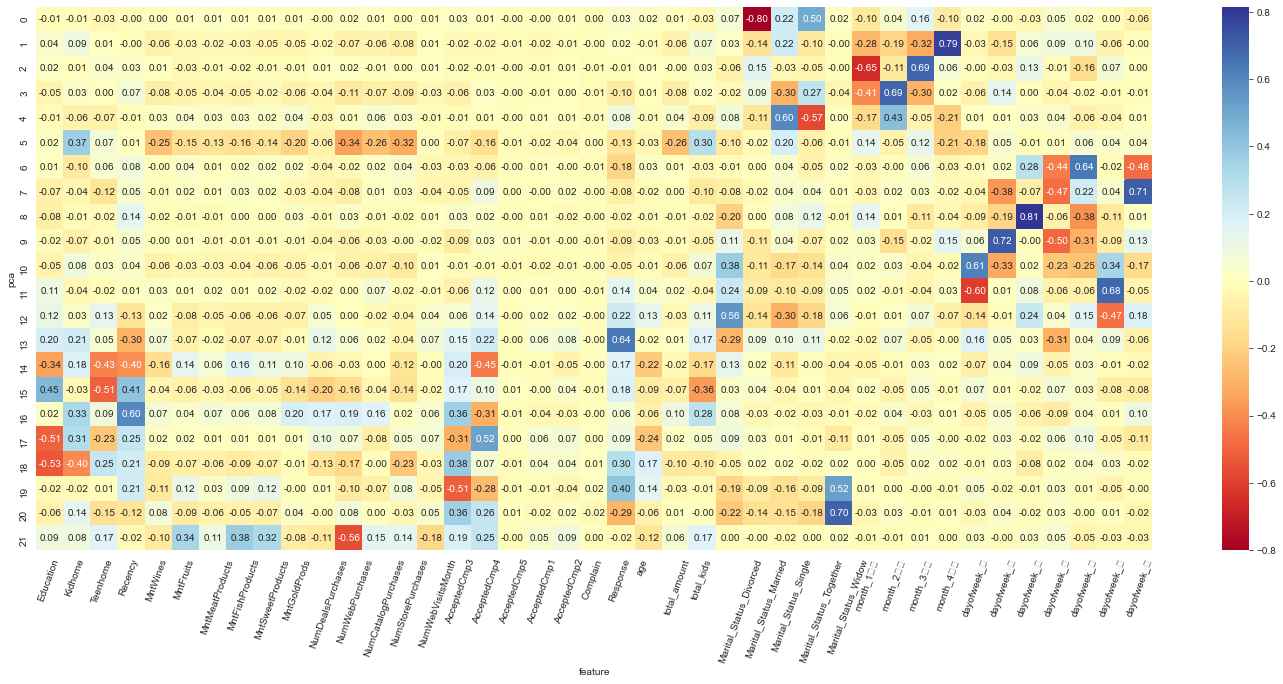

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,10))
sns.heatmap(pca.components_,annot=True,cmap="RdYlBu",fmt='.2f')
plt.xticks(range(len(data0.columns)), data0.columns, rotation = 70, ha = 'left')
plt.xlabel('feature')
plt.ylabel('pca')

### 총 37개


In [179]:
data0_1 = data0[['Education', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4',  'Response', 'age', 'total_amount',
       'total_kids', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'month_1분기', 'month_2분기', 'month_3분기',
       'month_4분기', 'dayofweek_금', 'dayofweek_목', 'dayofweek_수', 'dayofweek_월',
       'dayofweek_일', 'dayofweek_토', 'dayofweek_화']]
data0_1.head()

,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0.333333,0.0,0.0,0.585859,0.425318,0.442211,0.554878,0.664093,0.444444,0.335878,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.333333,0.5,0.5,0.383838,0.007368,0.005025,0.006098,0.007722,0.005051,0.022901,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.000000,0.5,0.0,0.949495,0.115874,0.216080,0.119919,0.177606,0.136364,0.057252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.666667,0.0,0.5,0.161616,0.348292,0.211055,0.099593,0.000000,0.212121,0.053435,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.333333,0.0,0.5,0.343434,0.157401,0.326633,0.166667,0.193050,0.247475,0.103053,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


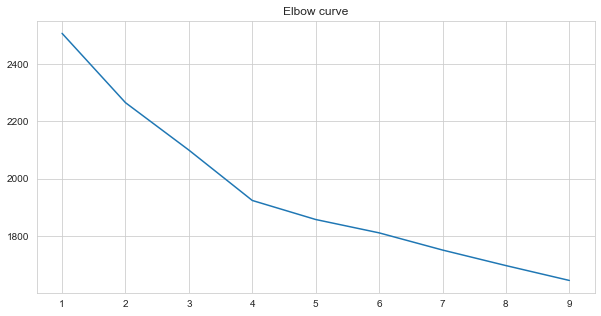

In [180]:
#data0_1
#혹시나하고 다시 돌려봤는데 역시 2~3인듯
distortions = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data0_1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [181]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data0_1)
data0_1['cluster'] = model.fit_predict(data0_1)
cust_m_k = model.cluster_centers_
cust_m_k = pd.DataFrame(cust_m_k, columns = data0_1.columns[:-1])
cust_m_k

,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0.599656,0.208763,0.420103,0.499896,0.200717,0.083407,0.092433,0.094137,0.090857,0.170497,...,8.326673e-17,1.000000e+00,-3.885781e-16,0.144330,0.149485,0.170103,0.128866,0.092784,0.170103,0.144330
1,0.584642,0.214660,0.395288,0.477074,0.185112,0.106080,0.098944,0.108007,0.089561,0.181008,...,2.775558e-17,3.885781e-16,-3.885781e-16,0.141361,0.157068,0.104712,0.130890,0.188482,0.125654,0.151832
2,0.550476,0.191429,0.377143,0.529697,0.157857,0.079110,0.091005,0.085979,0.094199,0.163533,...,1.000000e+00,3.885781e-16,-3.330669e-16,0.125714,0.211429,0.137143,0.131429,0.137143,0.120000,0.137143
3,0.611650,0.230583,0.412621,0.503236,0.166954,0.082622,0.088632,0.083892,0.066907,0.151708,...,5.551115e-17,4.996004e-16,1.000000e+00,0.131068,0.087379,0.174757,0.169903,0.184466,0.106796,0.145631


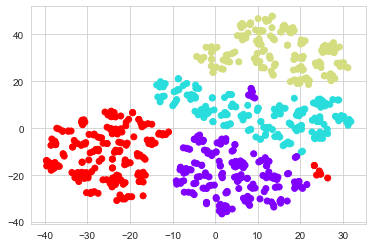

In [182]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data0_1.iloc[:, :-1])
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data0_1['cluster'], cmap=plt.cm.rainbow)

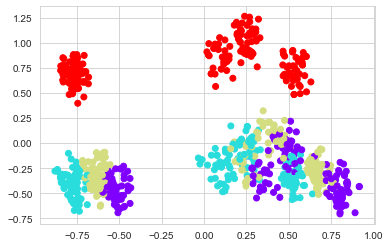

In [183]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토
X_pca = pca.fit_transform(data0_1.iloc[:, :-1])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data0_1['cluster'], cmap=plt.cm.rainbow)

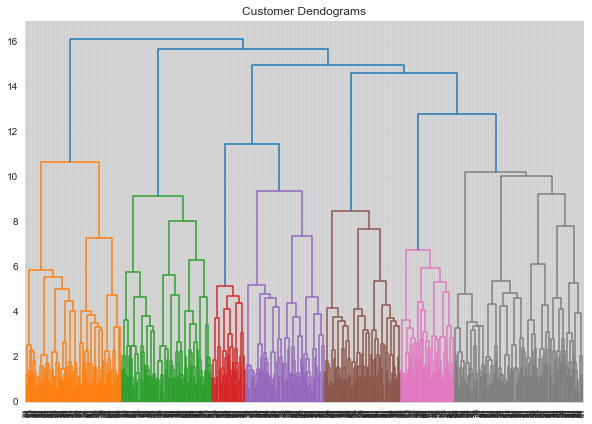

In [209]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data0_1.iloc[:,:-1], method='ward'))

In [210]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, linkage='ward')
data0_1['cluster'] = model.fit_predict(data0_1.iloc[:,:-1])

In [211]:
data0_1.groupby('cluster').mean()

,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.594954,0.205179,0.408367,0.480583,0.185300,0.099421,0.091131,0.106878,0.088233,0.167407,...,0.171315,0.123506,0.119522,0.211155,0.143426,0.099602,0.103586,0.254980,0.047809,0.139442
1,0.584946,0.212903,0.425806,0.503486,0.201435,0.087502,0.099023,0.093835,0.093353,0.169810,...,0.045161,0.819355,0.058065,0.116129,0.135484,0.135484,0.129032,0.000000,0.367742,0.116129
2,0.537634,0.193548,0.358871,0.534783,0.160766,0.076552,0.092308,0.087402,0.102599,0.173264,...,1.000000,0.000000,0.000000,0.048387,0.258065,0.193548,0.161290,0.064516,0.104839,0.169355
3,0.603535,0.219697,0.435606,0.516223,0.161116,0.068753,0.082556,0.070493,0.059841,0.142407,...,0.000000,0.000000,1.000000,0.113636,0.075758,0.181818,0.250000,0.189394,0.045455,0.143939
4,0.615385,0.240385,0.360577,0.493687,0.167094,0.098280,0.100463,0.093332,0.074641,0.181701,...,0.009615,0.346154,0.336538,0.115385,0.144231,0.182692,0.086538,0.182692,0.115385,0.173077


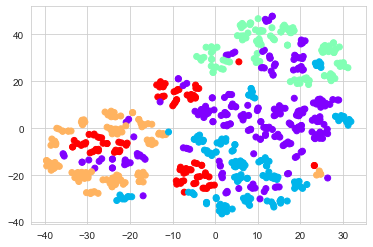

In [212]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data0_1.iloc[:, :-1])
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data0_1['cluster'], cmap=plt.cm.rainbow)

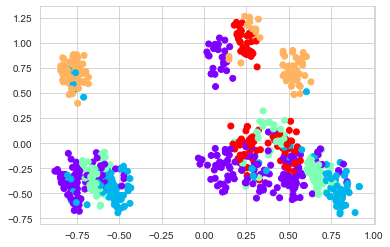

In [213]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토
X_pca = pca.fit_transform(data0_1.iloc[:, :-1])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data0_1['cluster'], cmap=plt.cm.rainbow)

### 수치들 비교 스케일링 전 데이터로 해봐야 함!!!

In [69]:
pd.set_option('display.max_columns', None)

- response/total_kids/total_amount/MntWines/MntFishProducts/MntGoldProds/NumCatalogPurchases/AcceptedCmp5 차이 유의미한 듯

# data1(하위권)

In [240]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) # 기존 상관관계 22개 변수 사용했었는데 Income 빠져서 21
cust_pca = pca.fit_transform(data1)

print('원본cust: ', str(data1.shape))
print('pcacust: ', str(cust_pca.shape))
print('pca 주성분 형태: ', pca.components_.shape)
print('각 주성분 분산 비율: ', pca.explained_variance_ratio_)
print('설명력: ', sum(pca.explained_variance_ratio_))

원본cust:  (718, 41)
pcacust:  (718, 27)
pca 주성분 형태:  (27, 41)
각 주성분 분산 비율:  [0.09700157 0.08597244 0.07048841 0.06373705 0.06232735 0.05732629
 0.05082009 0.03997335 0.03760774 0.03643217 0.03610571 0.03533176
 0.03375546 0.03270495 0.02781328 0.0264883  0.02279038 0.02173828
 0.01875346 0.01635026 0.01489046 0.0142313  0.0120308  0.01074602
 0.01019165 0.00945057 0.00913555]
설명력:  0.954194653849527


Text(205.0, 0.5, 'pca')

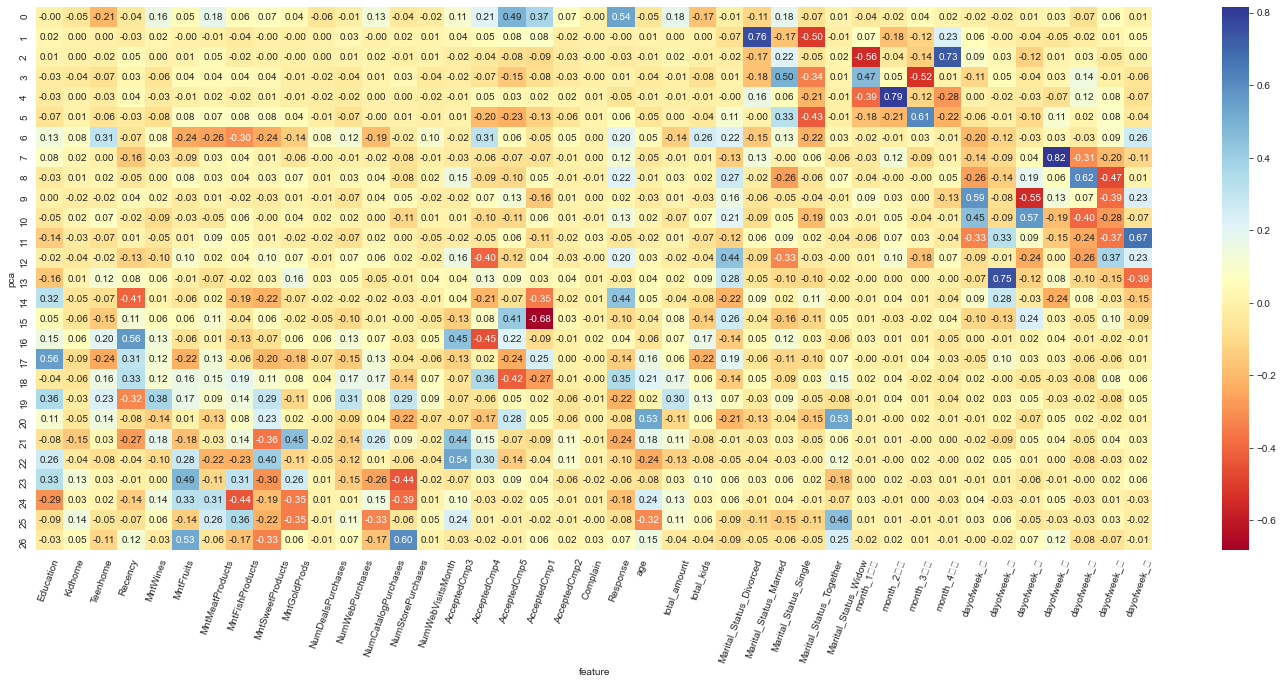

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,10))
sns.heatmap(pca.components_,annot=True,cmap="RdYlBu",fmt='.2f')
plt.xticks(range(len(data1.columns)), data1.columns, rotation = 70, ha = 'left')
plt.xlabel('feature')
plt.ylabel('pca')

### 총 38개


In [219]:
data1_1 = data1[['Education', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
      'Response', 'age', 'total_amount',
       'total_kids', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'month_1분기', 'month_2분기', 'month_3분기',
       'month_4분기', 'dayofweek_금', 'dayofweek_목', 'dayofweek_수', 'dayofweek_월',
       'dayofweek_일', 'dayofweek_토', 'dayofweek_화']]
data1_1.head()

,Education,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
2,0.333333,0.0,0.262626,0.285332,0.246231,0.129065,0.428571,0.106061,0.160305,0.066667,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,1.000000,0.0,0.232323,0.673811,0.110553,0.116870,0.227799,0.343434,0.171756,0.066667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,0.666667,0.5,0.919192,0.677830,0.402010,0.506098,0.000000,0.080808,0.671756,0.133333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21,1.000000,0.5,0.000000,0.257200,0.000000,0.103659,0.081081,0.161616,0.019084,0.200000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26,1.000000,0.0,0.969697,0.458138,0.502513,0.814024,0.081081,0.333333,0.000000,0.066667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


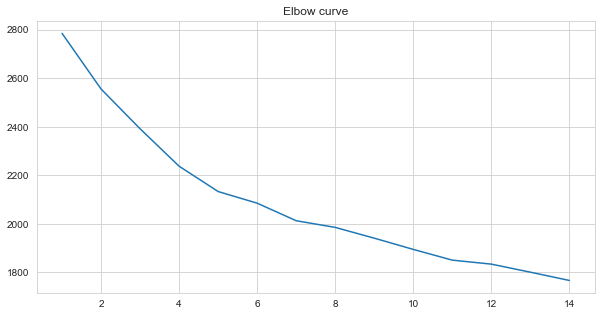

In [226]:
distortions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data1_1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [227]:
model = KMeans(n_clusters=5, random_state=42)
data1_1['cluster'] = model.fit_predict(data1_1)
cust_m_k = model.cluster_centers_
cust_m_k = pd.DataFrame(cust_m_k, columns = data1_1.columns[:-1])
cust_m_k

,Education,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0.559441,0.220280,0.535212,0.355004,0.267562,0.372776,0.305424,0.293742,0.255378,0.106760,...,1.000000e+00,1.387779e-16,1.665335e-16,0.153846,0.132867,0.139860,0.118881,0.216783,0.160839,0.076923
1,0.567657,0.049505,0.415842,0.597952,0.293597,0.504800,0.307772,0.330083,0.313166,0.067327,...,2.772277e-01,2.970297e-01,1.881188e-01,0.089109,0.069307,0.138614,0.158416,0.099010,0.247525,0.198020
2,0.576687,0.226994,0.493896,0.387345,0.278725,0.334125,0.327688,0.291659,0.262094,0.122290,...,-2.498002e-16,1.387779e-16,1.110223e-16,0.098160,0.141104,0.177914,0.153374,0.153374,0.122699,0.153374
3,0.544529,0.213740,0.491865,0.386864,0.300740,0.378956,0.335377,0.299175,0.278335,0.123664,...,-1.942890e-16,1.000000e+00,1.665335e-16,0.183206,0.114504,0.152672,0.175573,0.106870,0.137405,0.129771
4,0.583333,0.205556,0.517452,0.419945,0.282049,0.401152,0.286358,0.287514,0.258036,0.122593,...,-2.775558e-16,1.387779e-16,1.000000e+00,0.200000,0.144444,0.100000,0.161111,0.150000,0.088889,0.155556


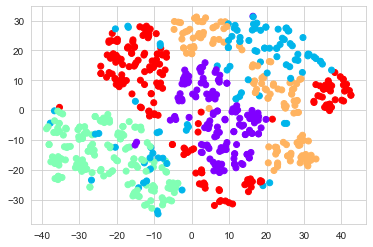

In [229]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data1_1.iloc[:, :-1])
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data1_1['cluster'], cmap=plt.cm.rainbow)

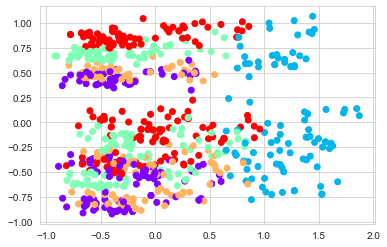

In [230]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토
X_pca = pca.fit_transform(data1_1.iloc[:, :-1])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data1_1['cluster'], cmap=plt.cm.rainbow)

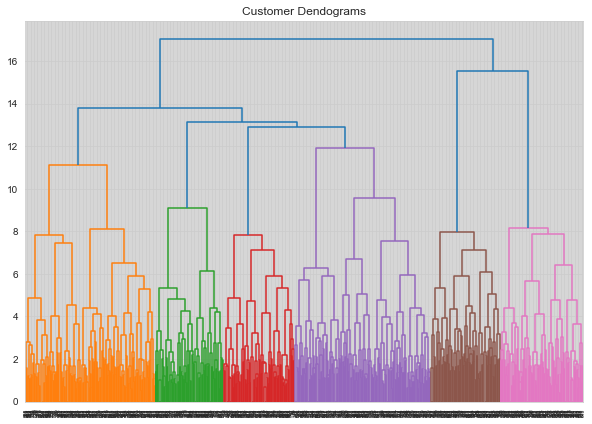

In [231]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data1_1.iloc[:,:-1], method='ward'))

In [233]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
data1_1['cluster'] = model.fit_predict(data1_1.iloc[:,:-1])

In [234]:
data0_1.groupby('cluster').mean()

,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.584946,0.212903,0.425806,0.503486,0.201435,0.087502,0.099023,0.093835,0.093353,0.169810,...,0.045161,0.819355,0.058065,0.116129,0.135484,0.135484,0.129032,0.000000,0.367742,0.116129
1,0.603535,0.219697,0.435606,0.516223,0.161116,0.068753,0.082556,0.070493,0.059841,0.142407,...,0.000000,0.000000,1.000000,0.113636,0.075758,0.181818,0.250000,0.189394,0.045455,0.143939
2,0.537634,0.193548,0.358871,0.534783,0.160766,0.076552,0.092308,0.087402,0.102599,0.173264,...,1.000000,0.000000,0.000000,0.048387,0.258065,0.193548,0.161290,0.064516,0.104839,0.169355
3,0.602637,0.220339,0.406780,0.482337,0.176401,0.099282,0.088558,0.109242,0.092507,0.172554,...,0.163842,0.096045,0.039548,0.220339,0.129944,0.090395,0.084746,0.293785,0.039548,0.141243
4,0.615385,0.240385,0.360577,0.493687,0.167094,0.098280,0.100463,0.093332,0.074641,0.181701,...,0.009615,0.346154,0.336538,0.115385,0.144231,0.182692,0.086538,0.182692,0.115385,0.173077
5,0.576577,0.168919,0.412162,0.476385,0.206586,0.099756,0.097286,0.101221,0.078010,0.155096,...,0.189189,0.189189,0.310811,0.189189,0.175676,0.121622,0.148649,0.162162,0.067568,0.135135


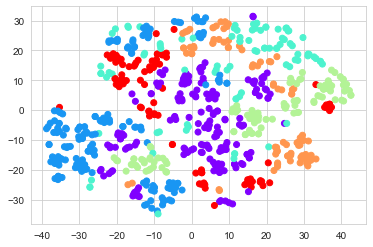

In [235]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data1_1.iloc[:, :-1])
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data1_1['cluster'], cmap=plt.cm.rainbow)

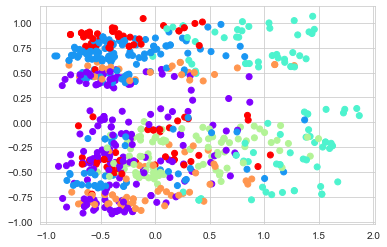

In [236]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토
X_pca = pca.fit_transform(data1_1.iloc[:, :-1])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data1_1['cluster'], cmap=plt.cm.rainbow)

# data2(중위권)

In [242]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95) # 기존 상관관계 22개 변수 사용했었는데 Income 빠져서 21
cust_pca = pca.fit_transform(data2)

print('원본cust: ', str(data2.shape))
print('pcacust: ', str(cust_pca.shape))
print('pca 주성분 형태: ', pca.components_.shape)
print('각 주성분 분산 비율: ', pca.explained_variance_ratio_)
print('설명력: ', sum(pca.explained_variance_ratio_))

원본cust:  (710, 41)
pcacust:  (710, 18)
pca 주성분 형태:  (18, 41)
각 주성분 분산 비율:  [0.11550625 0.09346981 0.0906243  0.08548637 0.07928109 0.05512428
 0.05179019 0.0505051  0.04607463 0.04486703 0.04284189 0.04113172
 0.04001321 0.03459465 0.02665853 0.02283343 0.02104356 0.01811664]
설명력:  0.9599626794068133


Text(205.0, 0.5, 'pca')

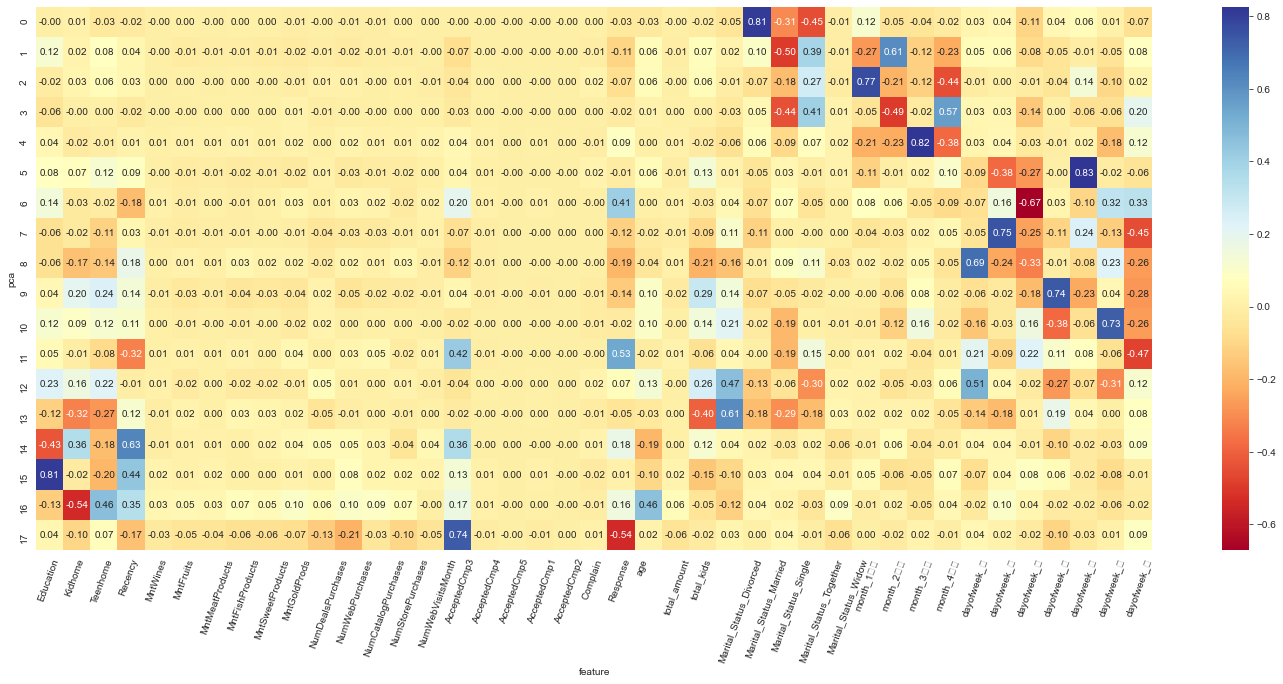

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25,10))
sns.heatmap(pca.components_,annot=True,cmap="RdYlBu",fmt='.2f')
plt.xticks(range(len(data2.columns)), data2.columns, rotation = 70, ha = 'left')
plt.xlabel('feature')
plt.ylabel('pca')

### 총 23개


In [252]:
data2_1 = data2[['Education', 'Kidhome', 'Teenhome', 'Recency',
       'AcceptedCmp3', 'Response', 'age',
       'total_kids', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'month_1분기', 'month_2분기', 'month_3분기',
       'month_4분기', 'dayofweek_금', 'dayofweek_목', 'dayofweek_수', 'dayofweek_월',
       'dayofweek_일', 'dayofweek_토', 'dayofweek_화']]
data2_1.head()

,Education,Kidhome,Teenhome,Recency,AcceptedCmp3,Response,age,total_kids,Marital_Status_Divorced,Marital_Status_Married,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
3,0.333333,0.5,0.0,0.262626,0.0,0.0,0.214286,0.333333,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,1.000000,0.5,0.0,0.323232,0.0,0.0,0.196429,0.333333,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,1.000000,0.5,0.0,0.191919,0.0,1.0,0.392857,0.333333,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,1.000000,0.5,0.5,0.686869,1.0,0.0,0.821429,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,0.000000,0.0,0.0,0.595960,0.0,0.0,0.357143,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


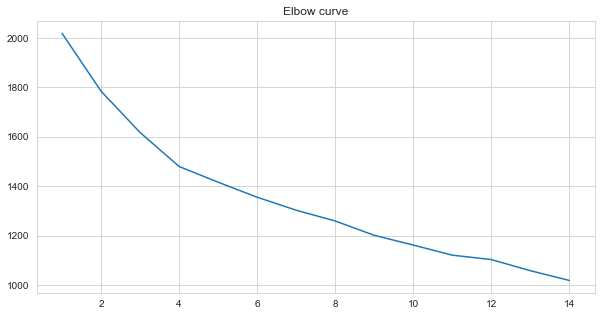

In [248]:
distortions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data2_1)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [253]:
model = KMeans(n_clusters=4, random_state=42)
data2_1['cluster'] = model.fit_predict(data2_1)
cust_m_k = model.cluster_centers_
cust_m_k = pd.DataFrame(cust_m_k, columns = data2_1.columns[:-1])
cust_m_k

,Education,Kidhome,Teenhome,Recency,AcceptedCmp3,Response,age,total_kids,Marital_Status_Divorced,Marital_Status_Married,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
0,0.573477,0.411290,0.174731,0.499783,0.064516,0.080645,0.419259,0.390681,0.112903,0.387097,...,1.000000e+00,-1.942890e-16,1.942890e-16,0.134409,0.155914,0.166667,0.112903,0.155914,0.155914,0.118280
1,0.514957,0.394231,0.141026,0.508677,0.108974,0.166667,0.403961,0.356838,0.064103,0.384615,...,-5.551115e-17,1.000000e+00,1.942890e-16,0.134615,0.160256,0.160256,0.128205,0.166667,0.070513,0.179487
2,0.465278,0.416667,0.164062,0.487216,0.078125,0.093750,0.421410,0.387153,0.088542,0.427083,...,5.551115e-17,-1.387779e-16,2.220446e-16,0.114583,0.145833,0.156250,0.119792,0.213542,0.125000,0.125000
3,0.452652,0.406250,0.127841,0.460973,0.085227,0.119318,0.381899,0.356061,0.096591,0.386364,...,0.000000e+00,-1.387779e-16,1.000000e+00,0.125000,0.136364,0.136364,0.142045,0.125000,0.176136,0.159091


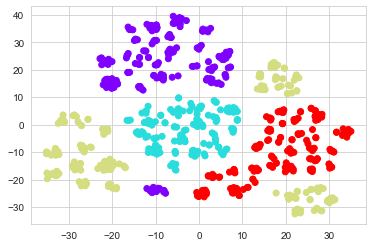

In [254]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data2_1.iloc[:, :-1])
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data2_1['cluster'], cmap=plt.cm.rainbow)

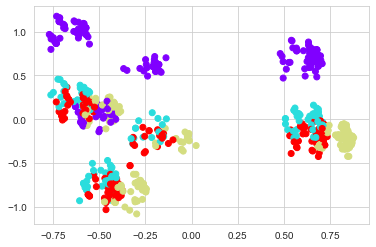

In [255]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토
X_pca = pca.fit_transform(data2_1.iloc[:, :-1])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data2_1['cluster'], cmap=plt.cm.rainbow)

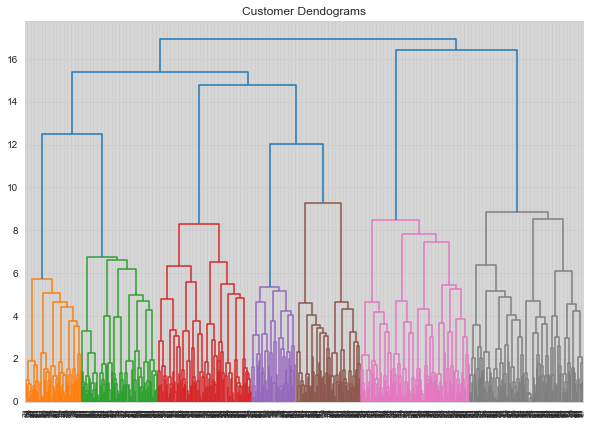

In [256]:
import scipy.cluster.hierarchy as shc
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data2_1.iloc[:,:-1], method='ward'))

In [261]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=7, linkage='ward')
data2_1['cluster'] = model.fit_predict(data2_1.iloc[:,:-1])

In [262]:
data0_1.groupby('cluster').mean()

,Education,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,month_2분기,month_3분기,month_4분기,dayofweek_금,dayofweek_목,dayofweek_수,dayofweek_월,dayofweek_일,dayofweek_토,dayofweek_화
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.584946,0.212903,0.425806,0.503486,0.201435,0.087502,0.099023,0.093835,0.093353,0.169810,...,0.045161,0.819355,0.058065,0.116129,0.135484,0.135484,0.129032,0.000000,0.367742,0.116129
1,0.603535,0.219697,0.435606,0.516223,0.161116,0.068753,0.082556,0.070493,0.059841,0.142407,...,0.000000,0.000000,1.000000,0.113636,0.075758,0.181818,0.250000,0.189394,0.045455,0.143939
2,0.537634,0.193548,0.358871,0.534783,0.160766,0.076552,0.092308,0.087402,0.102599,0.173264,...,1.000000,0.000000,0.000000,0.048387,0.258065,0.193548,0.161290,0.064516,0.104839,0.169355
3,0.602637,0.220339,0.406780,0.482337,0.176401,0.099282,0.088558,0.109242,0.092507,0.172554,...,0.163842,0.096045,0.039548,0.220339,0.129944,0.090395,0.084746,0.293785,0.039548,0.141243
4,0.615385,0.240385,0.360577,0.493687,0.167094,0.098280,0.100463,0.093332,0.074641,0.181701,...,0.009615,0.346154,0.336538,0.115385,0.144231,0.182692,0.086538,0.182692,0.115385,0.173077
5,0.576577,0.168919,0.412162,0.476385,0.206586,0.099756,0.097286,0.101221,0.078010,0.155096,...,0.189189,0.189189,0.310811,0.189189,0.175676,0.121622,0.148649,0.162162,0.067568,0.135135


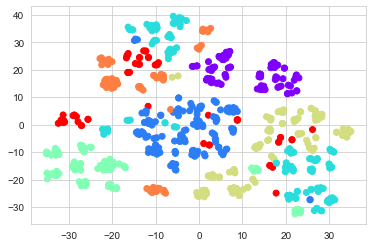

In [263]:
from sklearn.manifold import TSNE
# t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(data2_1.iloc[:, :-1])
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data2_1['cluster'], cmap=plt.cm.rainbow)

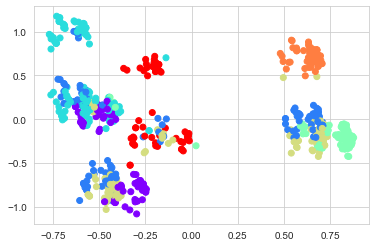

In [264]:
pca = PCA(n_components=2)  # pca를 진행해 클러스터가 얼마나 잘됐는지 검토
X_pca = pca.fit_transform(data2_1.iloc[:, :-1])

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data2_1['cluster'], cmap=plt.cm.rainbow)